In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
main = pd.read_csv(r"D:\Dataset\maintenance_data.csv")
main

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [8]:
#Data cleaning
main.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

In [9]:
main.dtypes

lifetime            int64
broken              int64
pressureInd       float64
moistureInd       float64
temperatureInd    float64
team               object
provider           object
dtype: object

In [10]:
for i in main.columns:
    print(i,':','\n',main[i].unique(),'\n')

lifetime : 
 [56 81 60 86 34 30 68 65 23 38 29 82 80 48 92 88 74 61 35 26 63 79 53 73
 13 36 31 25 58 19 84 12 15 43  1 20 16  3 18  7 47 39 57  4 24 28 49 76
 52  8 40 46  5 41 93 77 62 85 55 33 17 45  9 72 50 42 44 54 64 27 22 59
 66 83 14 51 71 21 78  6 69 89  2 67 87 11 10 32 37 90] 

broken : 
 [0 1] 

pressureInd : 
 [ 92.17885406  72.07593772  96.27225443  94.40646126  97.75289859
  87.67880097  94.61417404  96.48330289 105.486158    99.17823531
  97.81784409  67.81225145  86.36611059  76.14465414 103.1072633
  88.41407945  84.35504868  79.66925455  86.22910861  84.17942039
 100.0059233  115.6075596   97.69718903 101.4156229  118.9786971
 102.1127749  129.1243378  109.0330362  107.2980695  127.2639544
 138.1911205   72.55408417  95.21464918  91.24713174  81.55537698
  69.13459519 132.8574784   54.73533145  84.89864628  94.15228726
  84.34406647  95.75352436 123.9284399  101.5053508  120.9455502
  83.06857115 113.3491219   75.64669299 113.4358321   81.77978353
  68.85065142 150.6

In [11]:
main.describe(include='all')

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,NaN,TeamB,Provider2
freq,NaN,NaN,NaN,NaN,NaN,356,266
mean,55.195000,0.397000,98.599338,99.376723,100.628541,NaN,NaN
std,26.472737,0.489521,19.964052,9.988726,19.633060,NaN,NaN
min,1.000000,0.000000,33.481917,58.547301,42.279598,NaN,NaN
25%,34.000000,0.000000,85.558076,92.771764,87.676913,NaN,NaN
50%,60.000000,0.000000,97.216997,99.433959,100.592277,NaN,NaN
75%,80.000000,1.000000,112.253190,106.120762,113.662885,NaN,NaN


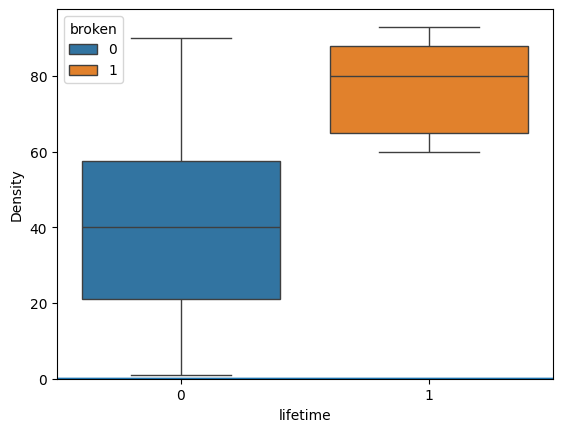

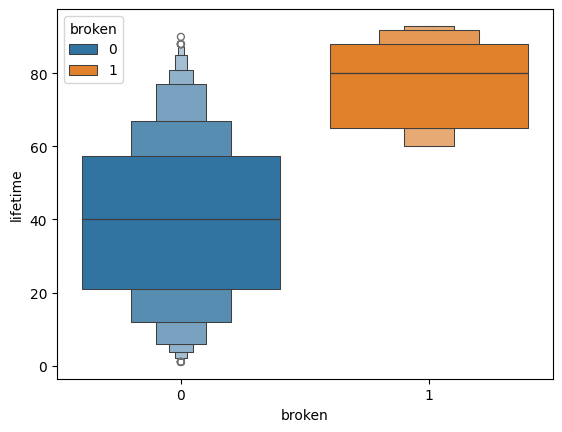

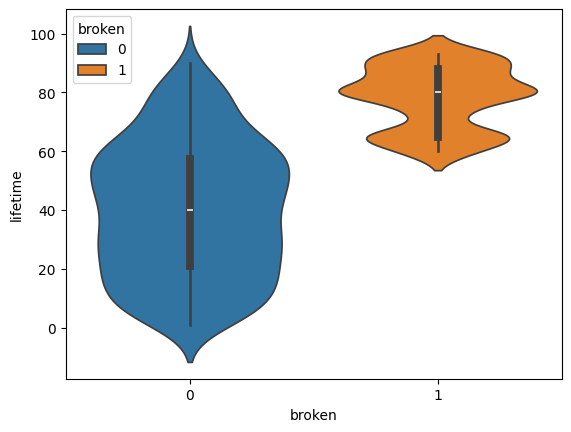

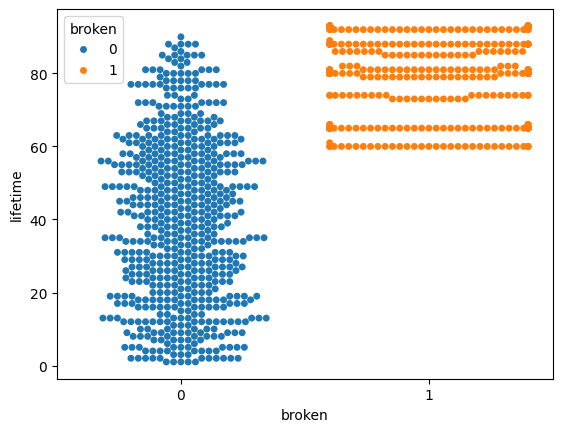

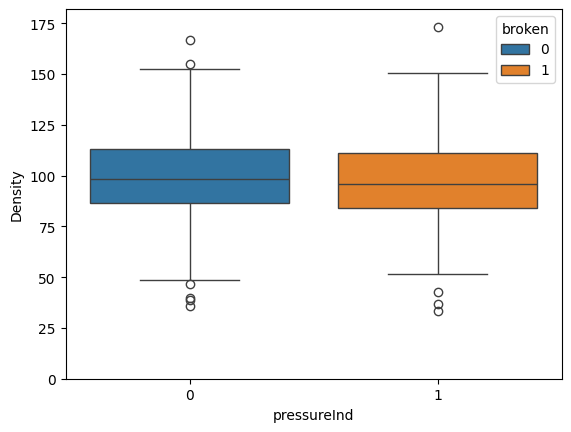

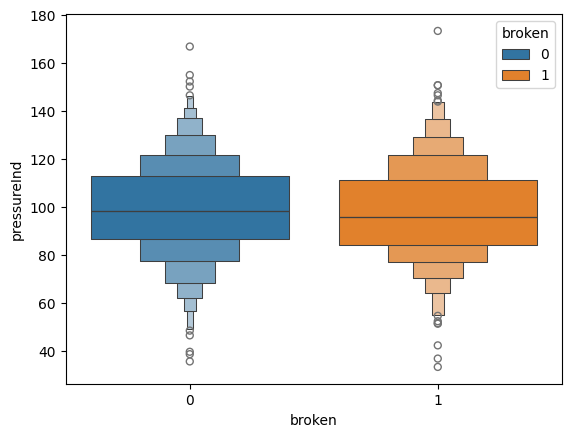

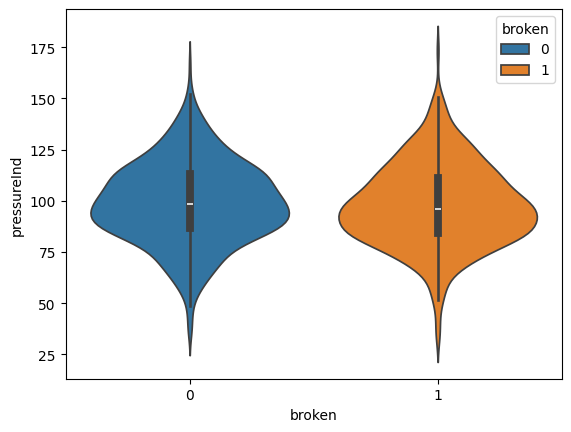

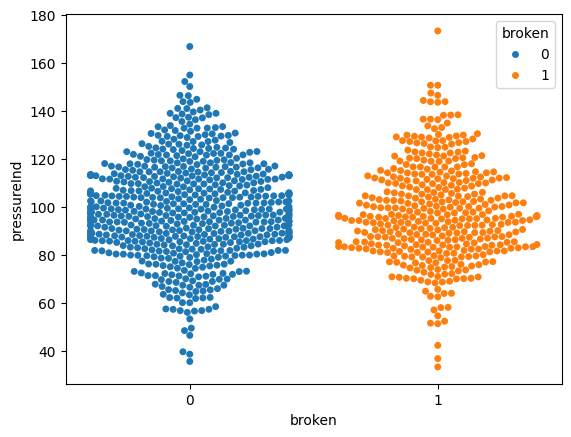

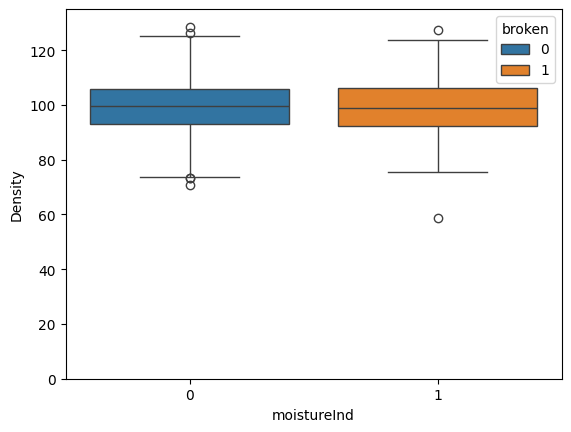

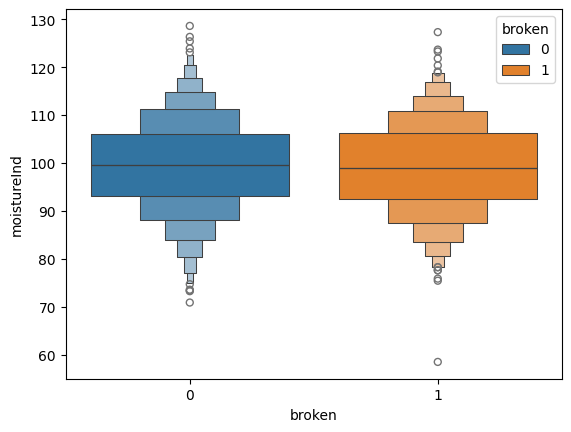

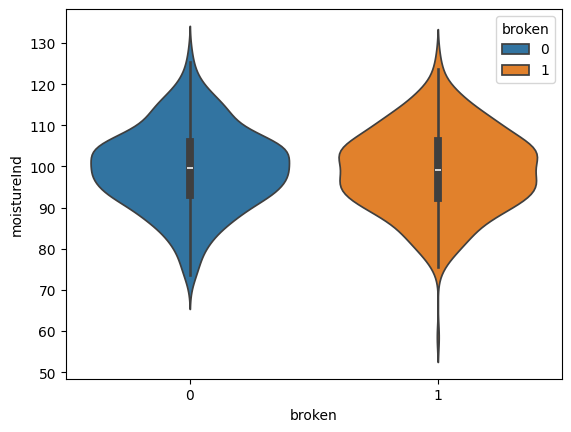

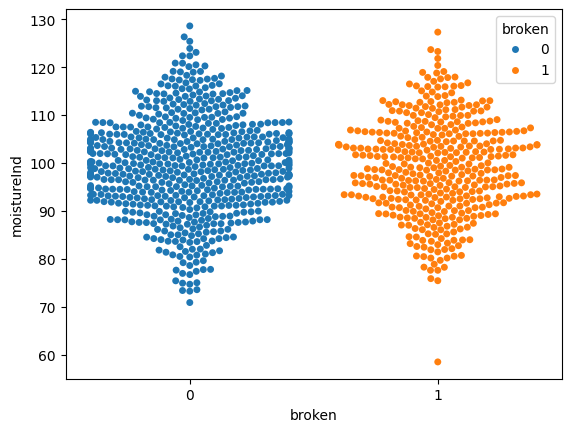

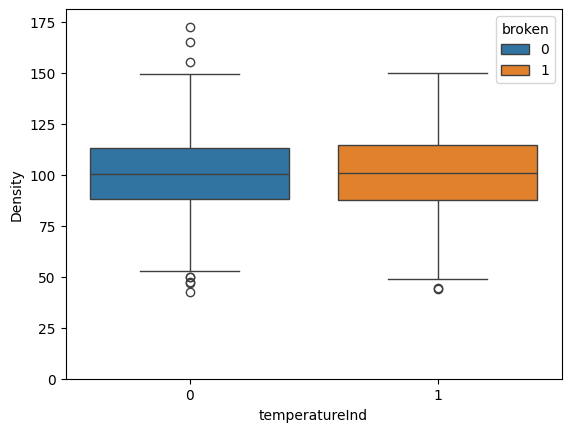

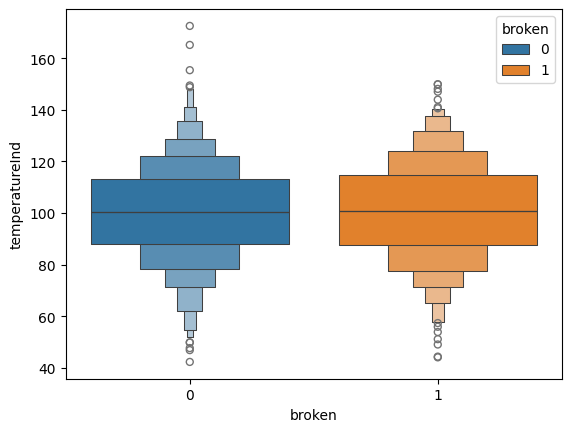

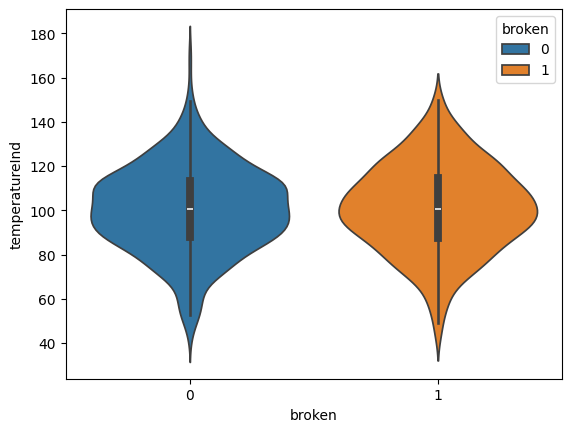

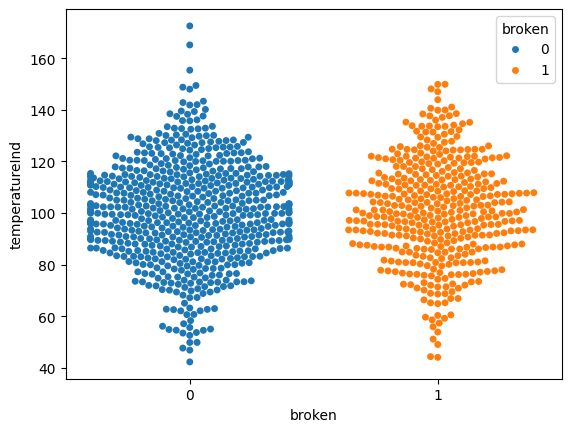

In [12]:
#EDA
for i in ['lifetime','pressureInd','moistureInd','temperatureInd']:
    sns.distplot(main[i][main.broken==0])
    sns.distplot(main[i][main.broken==1])
    
    #boxplot
    sns.boxplot(x=main.broken,y=main[i],hue=main.broken)
    plt.show()
    
    #boxenplot
    sns.boxenplot(x=main.broken,y=main[i],hue=main.broken)
    plt.show()
    
    #violinplot
    sns.violinplot(x=main.broken,y=main[i],hue=main.broken)
    plt.show()

    #swarmplot
    sns.swarmplot(x=main.broken,y=main[i],hue=main.broken)
    plt.show()

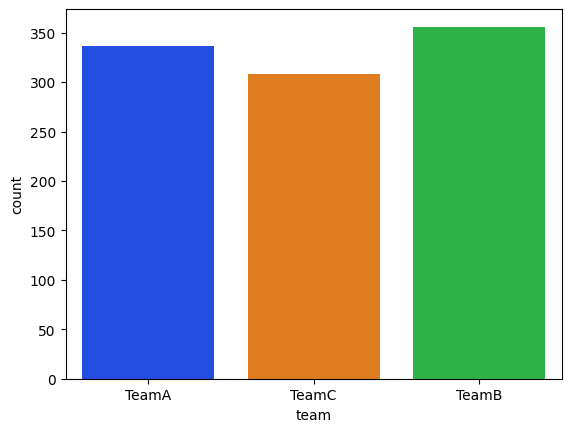

In [13]:
sns.countplot(x=main.team,palette='bright')
plt.show()

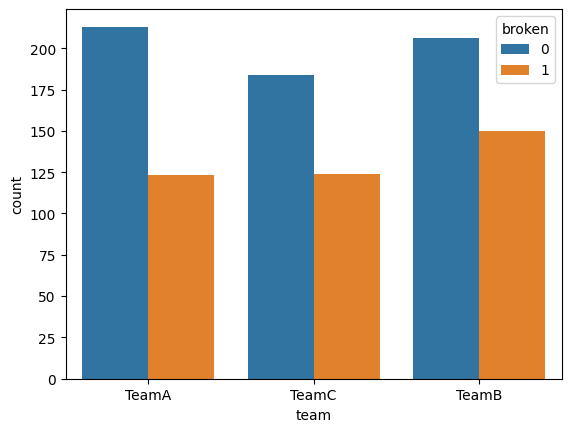

In [14]:
sns.countplot(x=main.team,hue=main.broken)
plt.show()

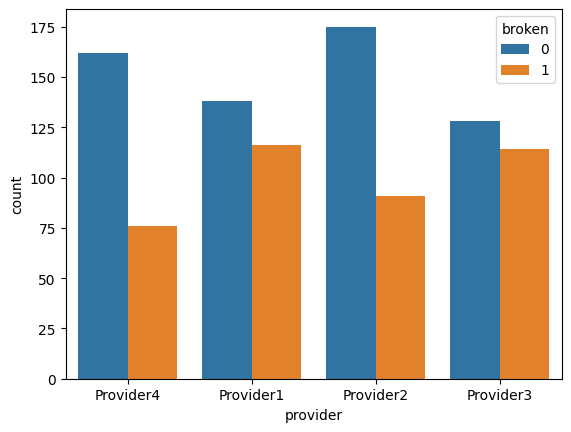

In [15]:
sns.countplot(x=main.provider,hue=main.broken)
plt.show()

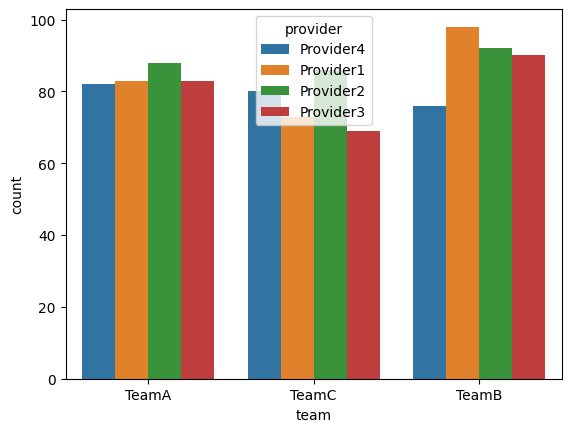

In [16]:
sns.countplot(x=main.team,hue=main.provider)
plt.show()

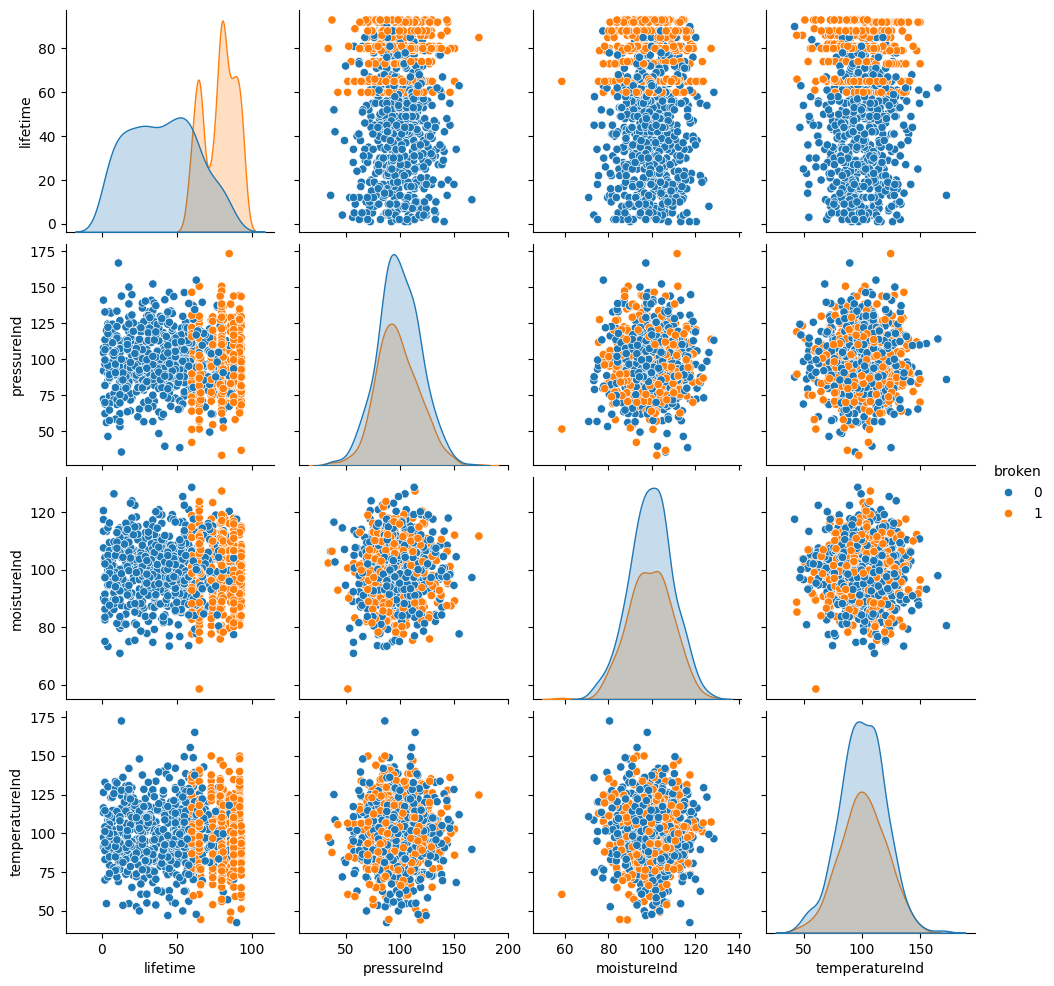

In [17]:
sns.pairplot(main,hue='broken')
plt.show()

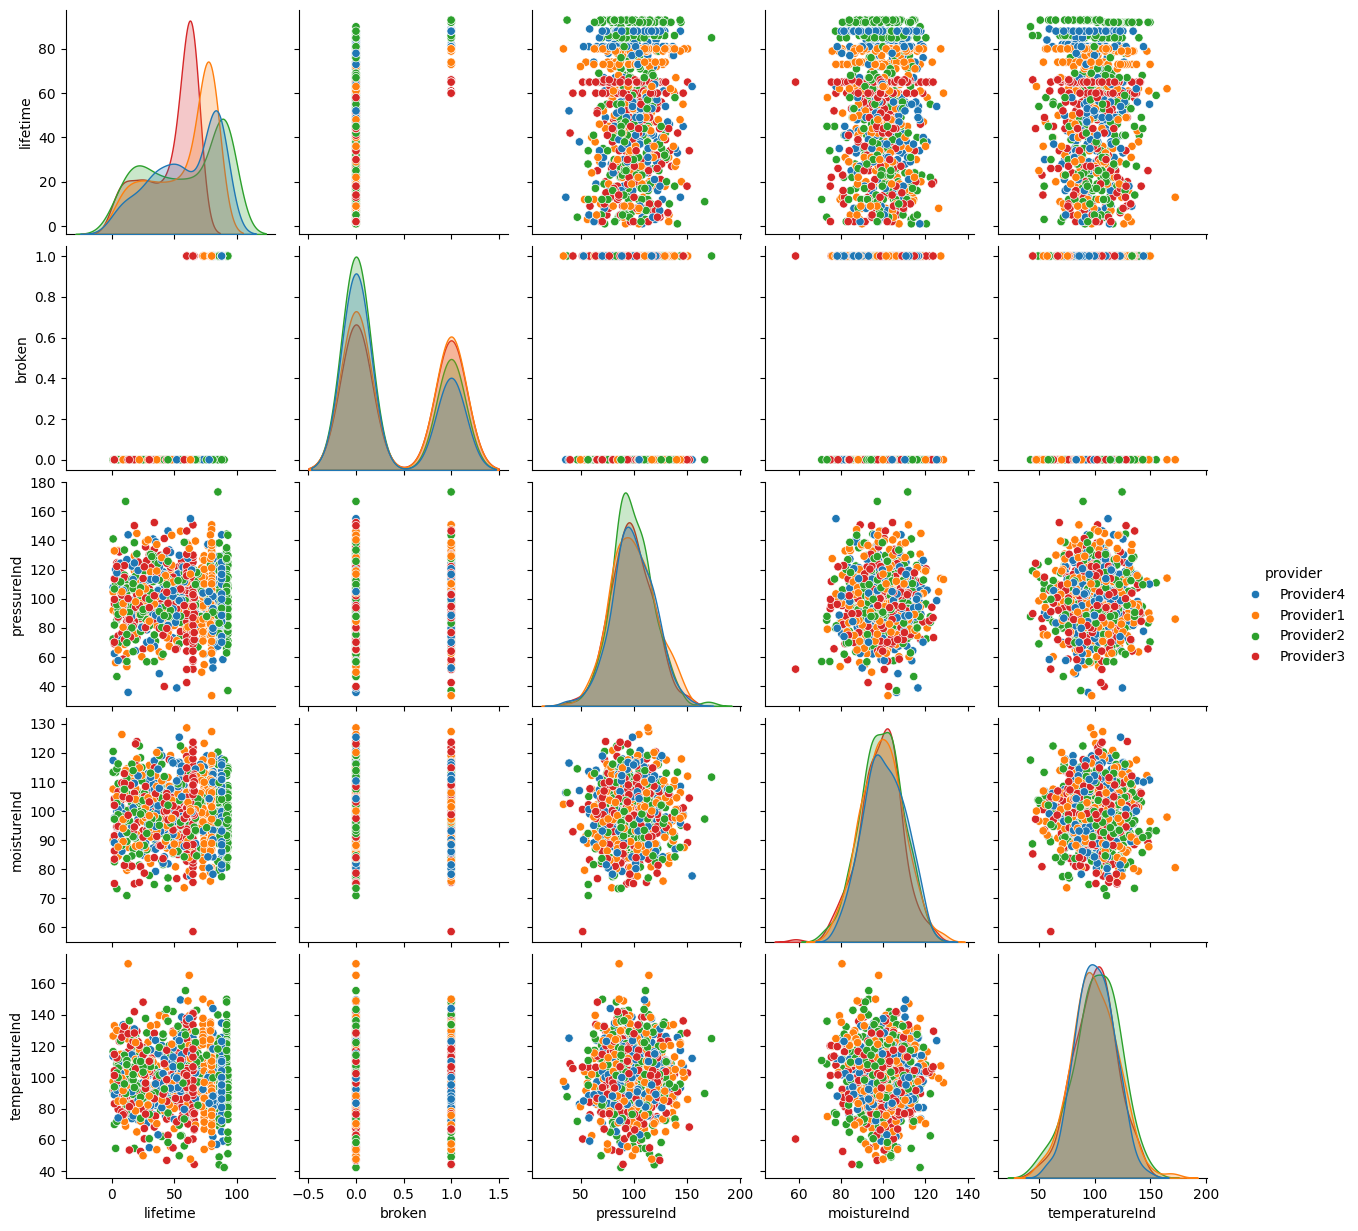

In [18]:
sns.pairplot(main,hue='provider')
plt.show()

In [19]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
main.team = le.fit_transform(main.team)
main.team.unique()

array([0, 2, 1])

In [21]:
le.inverse_transform([0,1,2])

array(['TeamA', 'TeamB', 'TeamC'], dtype=object)

In [22]:
main.provider = le.fit_transform(main.provider)
main.provider.unique()

array([3, 0, 1, 2])

In [23]:
le.inverse_transform([0,1,2,3])

array(['Provider1', 'Provider2', 'Provider3', 'Provider4'], dtype=object)

In [24]:
c = main.corr()
c

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
lifetime,1.000000,0.702656,0.000943,0.001196,0.001744,-0.046537,-0.025172
broken,0.702656,1.000000,-0.028942,-0.019520,0.015364,0.030876,-0.062972
pressureInd,0.000943,-0.028942,1.000000,0.020543,0.003641,-0.069528,-0.004337
moistureInd,0.001196,-0.019520,0.020543,1.000000,-0.009842,0.022420,0.028906
temperatureInd,0.001744,0.015364,0.003641,-0.009842,1.000000,0.007310,-0.010822
team,-0.046537,0.030876,-0.069528,0.022420,0.007310,1.000000,0.005606
provider,-0.025172,-0.062972,-0.004337,0.028906,-0.010822,0.005606,1.000000


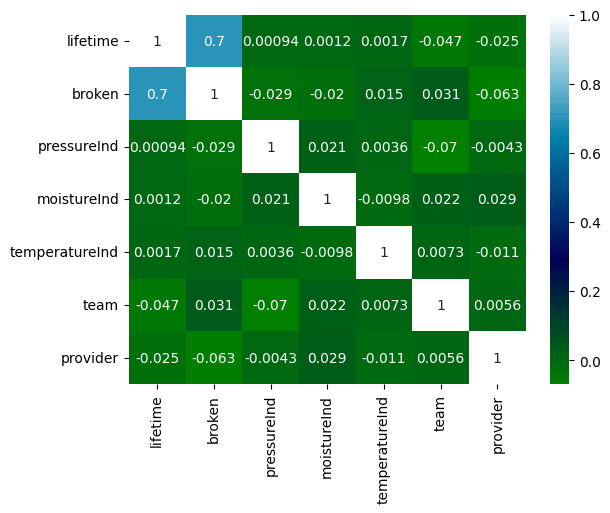

In [25]:
sns.heatmap(c,annot=True,cmap='ocean')
plt.show()

In [26]:
#ip op creation
ip = main.drop('broken',axis=1)
op = main.broken

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size=0.2)

In [28]:
x_test

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
276,61,105.706607,103.486198,59.641957,2,2
162,49,73.145139,95.243485,120.781024,0,3
206,76,87.092761,98.384748,79.957056,2,1
485,11,94.558452,97.760620,81.067751,0,0
107,63,154.924585,77.677249,112.048807,1,3
...,...,...,...,...,...,...
207,31,102.333639,96.422984,80.751661,0,2
201,57,89.345134,102.957647,97.168866,0,3
228,50,105.038295,93.953239,120.490000,2,3
827,81,83.486994,100.558804,128.303318,2,3


In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 6)
(800,)
(200, 6)
(200,)


In [30]:
#Standard scaler transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred = lr.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [33]:
y_test

276    1
162    0
206    0
485    0
107    0
      ..
207    0
201    0
228    0
827    1
740    0
Name: broken, Length: 200, dtype: int64

In [34]:
#Accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(pred,y_test)
re = recall_score(pred,y_test)
pr = precision_score(pred,y_test)
f1 = f1_score(pred,y_test)

print("Accuracy : ",ac)
print("Recall : ",re)
print("Precision : ",pr)
print("F1 Score : ",f1)

Accuracy :  0.82
Recall :  0.8169014084507042
Precision :  0.7160493827160493
F1 Score :  0.7631578947368421


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(pred,y_test)
cm

array([[106,  23],
       [ 13,  58]], dtype=int64)

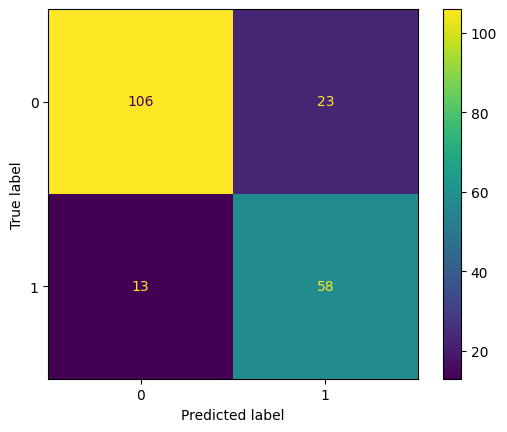

In [36]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [37]:
df = pd.DataFrame({'Y_test':list(y_test),'Prediction':pred})
df

,Y_test,Prediction
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
195,0,0
196,0,0
197,0,0
198,1,1


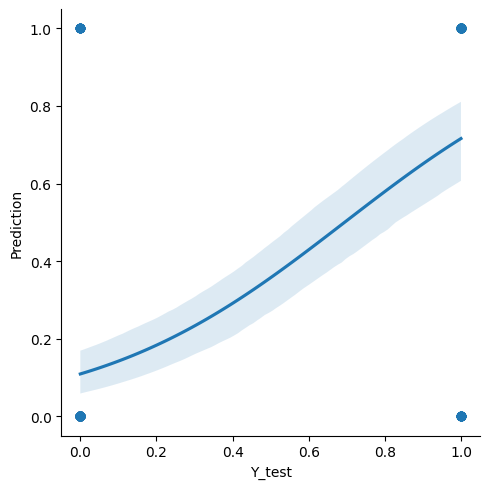

In [38]:
sns.lmplot(x='Y_test',y="Prediction",data=df,logistic=True)
plt.show()

## Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [40]:
pred1 = lr.predict(x_test)
pred1

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [41]:
y_test

276    1
162    0
206    0
485    0
107    0
      ..
207    0
201    0
228    0
827    1
740    0
Name: broken, Length: 200, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(pred1,y_test)
re = recall_score(pred1,y_test)
pr = precision_score(pred1,y_test)
f1 = f1_score(pred1,y_test)

print("Accuracy : ",ac)
print("Recall : ",re)
print("Precision : ",pr)
print("F1 Score : ",f1)

Accuracy :  0.82
Recall :  0.8169014084507042
Precision :  0.7160493827160493
F1 Score :  0.7631578947368421


In [43]:
cm = confusion_matrix(pred1,y_test)
cm

array([[106,  23],
       [ 13,  58]], dtype=int64)

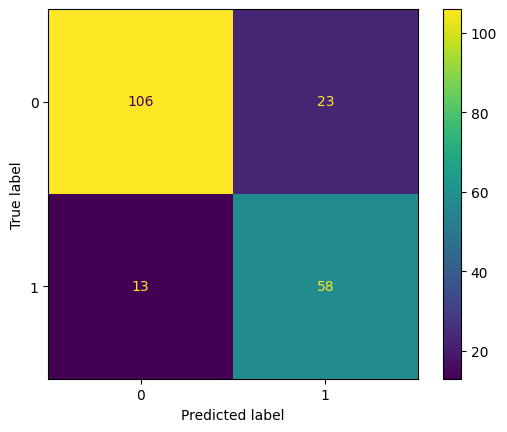

In [44]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
pred2 = knn.predict(x_test)
pred2

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(pred2,y_test)
re = recall_score(pred2,y_test)
pr = precision_score(pred2,y_test)
f1 = f1_score(pred2,y_test)

print("Accuracy : ",ac)
print("Recall : ",re)
print("Precision : ",pr)
print("F1 Score : ",f1)

Accuracy :  0.825
Recall :  0.7613636363636364
Precision :  0.8271604938271605
F1 Score :  0.7928994082840237


In [48]:
cm = confusion_matrix(pred2,y_test)
cm

array([[98, 14],
       [21, 67]], dtype=int64)

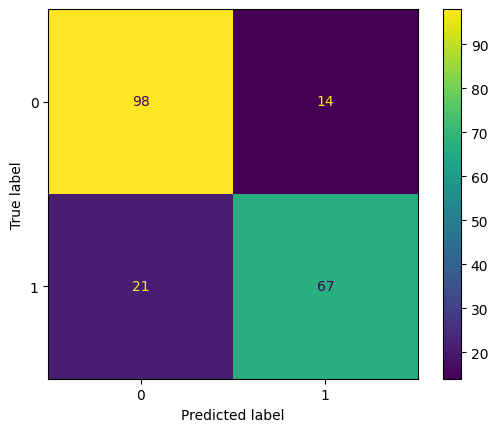

In [49]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## SVM : Support Vector Machine
## SVC : Support Vector Classifier 

In [56]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma=0.00,C=1000)
svc.fit(x_train,y_train)

SVC(C=1000, gamma=0.0)

In [57]:
pred3 = svc.predict(x_test)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(pred3,y_test)
re = recall_score(pred3,y_test)
pr = precision_score(pred3,y_test)
f1 = f1_score(pred3,y_test)

print("Accuracy : ",ac)
print("Recall : ",re)
print("Precision : ",pr)
print("F1 Score : ",f1)

Accuracy :  0.595
Recall :  0.0
Precision :  0.0
F1 Score :  0.0


In [61]:
cm = confusion_matrix(pred3,y_test)
cm

array([[119,  81],
       [  0,   0]], dtype=int64)

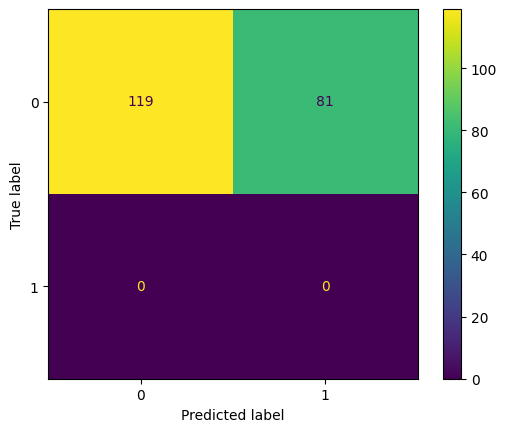

In [62]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [63]:
x_test

array([[ 0.22191274,  0.25829944,  0.45661076, -2.07158381,  1.23729565,
         0.53538715],
       [-0.22943521, -1.3058266 , -0.45172027,  1.05466289, -1.18877425,
         1.45846844],
       [ 0.78609767, -0.63583717, -0.10555912, -1.03280429,  1.23729565,
        -0.38769414],
       ...,
       [-0.19182288,  0.22619634, -0.59390298,  1.03978185,  1.23729565,
         1.45846844],
       [ 0.97415932, -0.80904418,  0.1340176 ,  1.43930316,  1.23729565,
         1.45846844],
       [-1.99721466,  0.63790413, -1.7499434 ,  0.20285591, -1.18877425,
         0.53538715]])

In [68]:
#Model testing
x = np.array([61,105.706607,103.486198,59.641957,2,2]).reshape(1,6)
print(x)
x = sc.fit_transform(x)
print(x)

[[ 61.       105.706607 103.486198  59.641957   2.         2.      ]]
[[0. 0. 0. 0. 0. 0.]]


In [69]:
lr.predict(x)

array([0], dtype=int64)

In [70]:
y = np.array([61,105.706607,103.486198,59.641957,2,2]).reshape(1,-1)
y = sc.fit_transform(y)

In [71]:
lr.predict(y)

array([0], dtype=int64)